In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [72]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
pd_data = pd.read_csv(url, header=None, encoding='cp949')
# print(pd_data.head())
np_data = pd_data.to_numpy()

Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years

0.8154606917560957 -0.019413705519976787


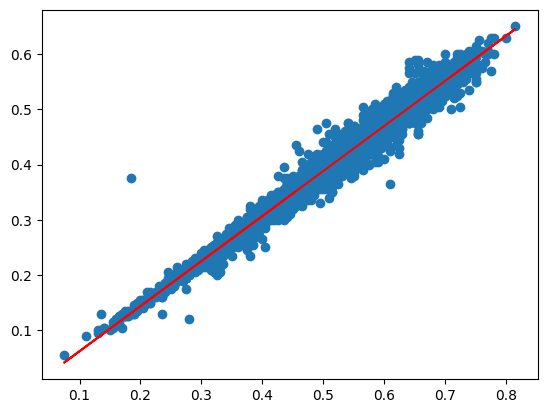

In [73]:
# plot, regression line

x = np_data[:,1].astype(np.float64) #Length
y = np_data[:,2].astype(np.float64) #Diameter

# length로 diameter 예측
# indep_var : length
# dep_var(종속변수) : diameter

x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)
xy_corr = np.corrcoef(x,y)[0,1]

slope = xy_corr*(y_std/x_std)
intercept = y_mean - slope*x_mean

print(slope, intercept)

_, axe = plt.subplots()
axe.scatter(x,y)
axe.plot(x, x*slope+intercept, c='r')

In [74]:
x = np_data[:,1].astype(np.float64) #Length
y = np_data[:,2].astype(np.float64) #Diameter

x = sm.add_constant(x)
print(x)

reg_model = sm.OLS(y, x)
reg_result = reg_model.fit()
print(reg_model)
print(reg_result)

print(reg_result.summary())
print(reg_result.params)

[[1.    0.455]
 [1.    0.35 ]
 [1.    0.53 ]
 ...
 [1.    0.6  ]
 [1.    0.625]
 [1.    0.71 ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:56   Log-Likelihood:                 11329.
No. Observations:                4177   AIC:                        -2.265e+04
Df Residuals:                    4175   BIC:                        -2.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [75]:
x = np_data[:,1:4].astype(np.float64) #Length, Diameter, Height
y = np_data[:,-1].astype(np.float64) #Rings : 나이

x = sm.add_constant(x)
reg_result = sm.OLS(y,x).fit()

print(reg_result.summary())
print(reg_result.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     767.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:56   Log-Likelihood:                -9898.7
No. Observations:                4177   AIC:                         1.981e+04
Df Residuals:                    4173   BIC:                         1.983e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8365      0.186     15.243      0.0

In [76]:
# 나이 = -11.93 * 길이 + 25.76 * 지름(diameter) + 20.35 * 높이(Height) + 2.83
#x_org = np_data[:,1:4].astype(np.float64)
print(x)
print(x.shape, reg_result.params.shape)

print(reg_result.params)

pred = np.sum(x * reg_result.params, axis=1)
print(pred) # 예측값
print(y)  # 실제값

sse = np.sum((pred-y)**2)
print(sse)

[[1.    0.455 0.365 0.095]
 [1.    0.35  0.265 0.09 ]
 [1.    0.53  0.42  0.135]
 ...
 [1.    0.6   0.475 0.205]
 [1.    0.625 0.485 0.15 ]
 [1.    0.71  0.555 0.195]]
(4177, 4) (4,)
[  2.83647907 -11.93268123  25.76614753  20.35823401]
[ 8.74578519  7.3203108  10.08230157 ... 12.08922838 10.92886996
 12.63434291]
[15.  7.  9. ...  9. 10. 12.]
27976.38631260371
